<a href="https://www.kaggle.com/code/muhammadmeftahmafazy/skripsi-meftah?scriptVersionId=128303098" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Mengimpor *Library*

In [2]:
# feature extractoring and preprocessing data
import librosa
import librosa, librosa.display, os, csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline
import os
from PIL import Image
import pathlib
import csv

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, cross_val_predict, cross_validate, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,roc_curve,roc_auc_score, auc, plot_roc_curve
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE

#Pytorch
import torch

from imblearn.pipeline import Pipeline

import joblib

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#Other
from IPython.display import Audio
from tqdm import tqdm

In [ ]:
!ls ../input/coughvid-19/dataset/archive_wav/archive_wav

In [ ]:
dataset = "../input/coughvid-19/dataset/metadata_wav.csv"
train_csv = pd.read_csv(dataset, index_col=0)
train_csv

# Konversi Audio menjadi Spektrogram

In [ ]:
cmap = plt.get_cmap('inferno')
tot_rows = train_csv.shape[0]
print ('total_rows',tot_rows, 'columns: ', train_csv.shape[1])
for i in range(0,1): #Thay range(1) = range(tot_rows)
    source = train_csv.iloc[6]["file"]
    filename = '../input/coughvid-19/dataset/archive_wav/archive_wav/'+source
    y,sr = librosa.load(filename, mono=True, duration=5)
    plt.specgram(y, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap='magma', sides='default', mode='default', scale='dB');
    #plt.axis('off');
    plt.savefig(f'./{source[:-3].replace(".", "")}.png')
    print (source[:-4]) #Remove the last 4 characters ".wav"
    #plt.clf() 

# Ekstraksi Fitur

## Ekstraksi fitur saat ini terdapat 6 ekstraksi yang nantinya kemungkinan akan bertambah :

*     Chroma Short Time Fourier Transform (STFT)
*     Spectral Centroid
*     Spectral Bandwidth
*     Spectral Rolloff
*     Zero Crossing Rate
*     Mel Frequency Cepstral Coefficient (MFCC)

In [ ]:
# #Membuat Header
# header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
# for i in range(1, 11):
#     header += f' mfcc{i}'
# header += ' label'
# header = header.split()
# print(header)

In [ ]:
# #Proses Ekstraksi Fitur
# file = open('data_new_extended.csv', 'w')
# with file:
#     writer = csv.writer(file)
#     writer.writerow(header)
# # data_new_extended = pd.read_csv('./data_new_extended.csv')
# #print ('data_new_extended\n',data_new_extended)
# for i in tqdm(range(train_csv.shape[0])):
#         source = train_csv.iloc[i]["file"]
# #         print ('source',source)
#         file_name = '../input/coughvid-19/dataset/archive_wav/archive_wav/'+source
#         label =  train_csv.iloc[i]["status"]
# #         print ('\status', label)
#         y,sr = librosa.load(file_name, mono=True, duration=5)
#         chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
# #         chroma_cqt = librosa.feature.chroma_cqt(y=y, sr=sr)
# #         chroma_cens = librosa.feature.chroma_cens(y=y, sr=sr)
# #         chroma_vqt = librosa.feature.chroma_vqt(y=y, sr=sr, intervals=[])
# #         mel_spectro = librosa.feature.melspectrogram(y=y, sr=sr)
#         rmse = librosa.feature.rms(y=y)
#         spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr,hop_length=1024)
#         spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr,hop_length=1024)
#         rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr,hop_length=1024) #Nên có hop-length
#         #print ('spec_cent',spec_cent, 'shape:',spec_cent.shape)
#         #print ('spec_bw',spec_bw, 'shape:',spec_bw.shape)
#         #print ('rolloff',rolloff, 'shape:',rolloff.shape)
#         zcr = librosa.feature.zero_crossing_rate(y)
#         mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=30)
#         #print ('mfcc',mfcc)
        
# # mendapatkan nilai rata rata, perlu dimasukkan ke var to_append {np.mean(chroma_cqt)} {np.mean(chroma_vqt)} {np.mean(chroma_cens)} {np.mean(mel_spectro)}
#         to_append = f'{np.mean(chroma_stft)}  {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
#         #np.mean nilai rata-rata
#         librosa.display.specshow(mfcc, x_axis='time') #Show MFCC
#         plt.title('MFCC')
#         #plt.show()
        
#         for e in mfcc:
#             to_append += f' {np.mean(e)}'
#         to_append += f' {label}'
#         value = [str(source)]
#         value.extend(to_append.split())
#         file = open('./data_new_extended.csv', 'a')
#         with file:
#             writer = csv.writer(file)
#             writer.writerow(value)

# Mengunduh Data *CSV*

In [ ]:
# Downloading the received file
from IPython.display import HTML
import pandas as pd
import numpy as np

def create_download_link(title = "Download CSV file", filename = "./data_new_extended.csv"):  
    html = '<a href={filename}>{title}</a>'
    html = html.format(title=title,filename=filename)
    return HTML(html)

# create a link to download the dataframe which was saved with .to_csv method
create_download_link(filename='./data_new_extended.csv')

# Inisial Dataset

In [3]:
#Panggil Dataset
data = pd.read_csv("../input/coughvid-19/dataset/data_mfcc10.csv")

In [4]:
#Menghapus kolom nama file
data_new = data.drop('filename', axis=1)

In [5]:
#Mengubah label menjadi numerik
data_new['label'].replace(['healthy', 'COVID-19'], [0,1], inplace=True)

In [6]:
# memisahkan atribut pada dataset dan menyimpannya pada sebuah variabel. 
# array ke-16 untuk dataset 10 mfcc
# array ke-26 untuk dataset 20 mfcc
# array ke-36 untuk dataset 30 mfcc
X = data_new[data_new.columns[:16]]

# memisahkan label pada dataset dan menyimpannya pada sebuah variabel
y = data_new['label']

# Klasifikasi menggunakan *SVM* dengan Stratified K-Fold (Data Training)

In [31]:
# Inisialisasi objek stratified k-fold dengan inisial skf
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Melakukan scaling pada data
scaler = StandardScaler()

# preprocessed_normalized = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

results_train=[]

# Inisialisasi objek SVM
# pipe = SVC(kernel='rbf',  C=5, gamma="auto", probability=True)
clf = SVC(kernel='rbf',  C=1, gamma="auto", probability=True)
# pipe = SVC(kernel='rbf')

# Loop untuk setiap fold
for train_index, test_index in skf.split(X, y):
    
    # Memisahkan data untuk training dan testing
    X_train, X_test = X.values[train_index], X.values[test_index]
    y_train, y_test = y.values[train_index], y.values[test_index]
    
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    # Melakukan training pada model SVM
    clf.fit(X_train, y_train)
    
    # Melakukan prediksi pada data testing
    y_pred_train = clf.predict(X_train)
    
    # Memprediksi probabilitas hasil klasifikasi pada data training
    y_prob_train = clf.predict_proba(X_train)[:, 1]

# Confusion Matrix Data Training

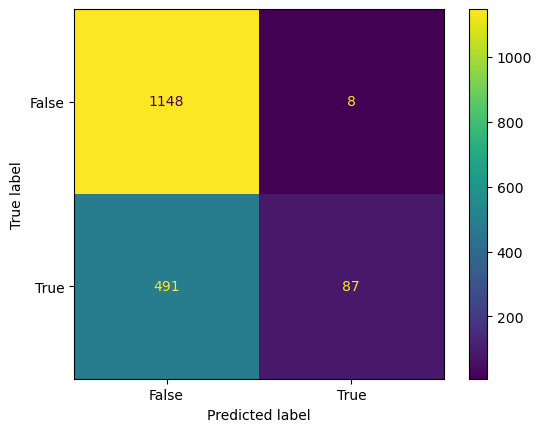

   Accuracy  Precision  Sensitivity_recall  Specificity       AUC
0  0.712226   0.915789            0.150519      0.99308  0.809039


In [33]:
# Confusion Matrix
confusion_matrix_train = metrics.confusion_matrix(y_train, y_pred_train)

cm_display_train = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_train, display_labels = [False, True])

cm_display_train.plot()
plt.show()

Accuracy_train = metrics.accuracy_score(y_train, y_pred_train)
Precision_train = metrics.precision_score(y_train, y_pred_train)
Sensitivity_recall_train = metrics.recall_score(y_train, y_pred_train)
Specificity_train = metrics.recall_score(y_train, y_pred_train, pos_label=0)

# Menampilkan AUC pada data training
auc_train = roc_auc_score(y_train, y_prob_train)

# Simpan hasil ke dalam list
results_train.append({'Accuracy': Accuracy_train,"Precision":Precision_train,"Sensitivity_recall":Sensitivity_recall_train,"Specificity":Specificity_train, 'AUC':auc_train})

# Buat dataframe dari hasil
df_train = pd.DataFrame(results_train)

# Print dataframe
print(df_train)

# Klasifikasi menggunakan *SVM* dengan Stratified K-Fold (Data Testing)

In [40]:
# Inisialisasi objek stratified k-fold dengan inisial skf
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Melakukan scaling pada data
scaler = StandardScaler()

results=[]

# Inisialisasi objek SVM
# pipe = SVC(kernel='rbf',  C=5, gamma="auto", probability=True)
clf = SVC(kernel='rbf',  C=10, gamma="auto", probability=True)
# pipe = SVC(kernel='rbf')

# Loop untuk setiap fold
for train_index, test_index in skf.split(X, y):
    
    # Memisahkan data untuk training dan testing
    X_train, X_test = X.values[train_index], X.values[test_index]
    y_train, y_test = y.values[train_index], y.values[test_index]
    
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    # Melakukan training pada model SVM
    clf.fit(X_train, y_train)
    
    # Melakukan prediksi pada data testing
    y_pred = clf.predict(X_test)
    
    # Hitung Probabilitas
    y_prob = clf.decision_function(X_test)

In [31]:
skf = KFold(n_splits=10, shuffle=True, random_state=42)

clf = SVC(kernel='rbf')

clf_scores = cross_val_score(clf, X, y, cv=skf)

print('Stratified cross-validation scores with rbf kernel:\n\n{}'.format(clf_scores))

NameError: name 'svc' is not defined

In [33]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

clf = SVC(kernel='rbf', probability=True)

# fit classifier to training set
clf.fit(X_train,y_train)


# make predictions on test set
y_pred=clf.predict(X_test)

scoring = ['accuracy', 'roc_auc']

scores = cross_validate(clf, X, y, cv=skf, scoring=scoring, return_train_score=True)

print('Stratified cross-validation scores with rbf kernel:\n\nAccuracy:', scores['test_accuracy'])
print('AUC:', scores['test_roc_auc'])
print('Confusion matrix:', confusion_matrix(y_test, y_pred))

Stratified cross-validation scores with rbf kernel:

Accuracy: [0.66839378 0.66839378 0.66839378 0.66839378 0.66321244 0.66321244
 0.66666667 0.66666667 0.66666667 0.66666667]
AUC: [0.60707364 0.58745155 0.56528585 0.56589147 0.55324519 0.62007212
 0.59448242 0.57226562 0.56872559 0.57226562]


TypeError: 'numpy.ndarray' object is not callable

# Splitting Data

In [17]:
scaler.fit(X)
X = scaler.transform(X)

# # memisahkan data untuk training dan testing
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42 )

X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size=0.4)

# membuat objek SVC dan memanggil fungsi fit untuk melatih model
clf = SVC(kernel="rbf", C=0.1, gamma=0.1, probability=True)
clf.fit(X_train, y_train)

# Menampilkan skor akurasi prediksi
clf.score(X_test, y_test)

# Memprediksi probabilitas hasil klasifikasi pada data testing
y_prob = clf.predict_proba(X_test)[:, 1]

# Memprediksi label kelas pada data testing
y_pred = clf.predict(X_test)

# Menampilkan skor akurasi dan AUC
print('Accuracy Score:', clf.score(X_test, y_test))
print('AUC Score:', roc_auc_score(y_test, y_prob))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

0.0

# Stratified Sampling

In [9]:
# Inisialisasi objek scaler untuk scaling data
scaler = StandardScaler()

# Melakukan scaling pada data
X_scaled = scaler.fit_transform(X)

# Membuat objek StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, 
                                                    test_size=0.25)

# Loop untuk setiap fold
for train_index, test_index in sss.split(X_scaled, y):
    # Memisahkan data untuk training dan testing
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Membuat objek SVC dan memanggil fungsi fit untuk melatih model
    clf = SVC(probability=True)
    clf.fit(X_train, y_train)

    # Memprediksi probabilitas hasil klasifikasi pada data testing
    y_prob = clf.predict_proba(X_test)[:, 1]

    # Memprediksi label kelas pada data testing
    y_pred = clf.predict(X_test)

NameError: name 'StratifiedShuffleSplit' is not defined

In [ ]:
scaler.fit(X)
X = scaler.transform(X)

# membuat objek SVC
clf = SVC(probability=True)

scores = cross_val_score(clf, X, y, cv = 10)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [75]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Mencari parameter terbaik menggunakan Grid Search
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 10, 100], 'kernel': ['rbf']}
clf = GridSearchCV(SVC(), param_grid, cv=10)
clf.fit(X_train_scaled, y_train)

# Menampilkan parameter terbaik dan skor akurasi pada data testing
print("Best parameters: ", clf.best_params_)
print("Accuracy on test set: ", clf.score(X_test_scaled, y_test))

Best parameters:  {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Accuracy on test set:  0.6979166666666666


In [13]:
# Mengecek jumlah kelas yang ada di y_test
num_classes = len(np.unique(y_test))

# Cetak jumlah kelas
print("Jumlah kelas: ", num_classes)

Jumlah kelas:  2


In [14]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
# print(len(X_train))
# print(len(X_test))
print("training",pd.value_counts(y_train))
print("testing",pd.value_counts(y_test))

(1734, 16)
(192, 16)
(1734,)
(192,)
training 0    1156
1     578
dtype: int64
testing 0    128
1     64
dtype: int64


In [15]:
print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))

Training set score: 0.7428
Test set score: 0.6979


# Confusion Matrix

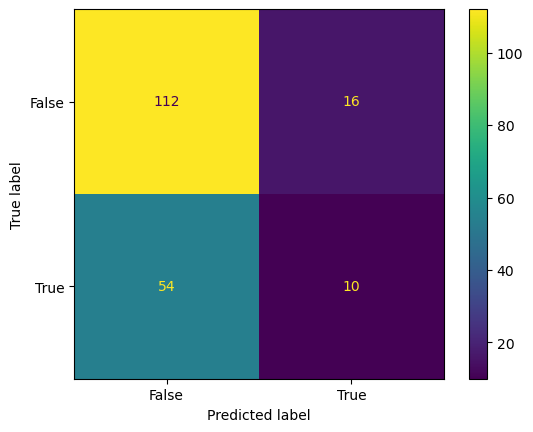

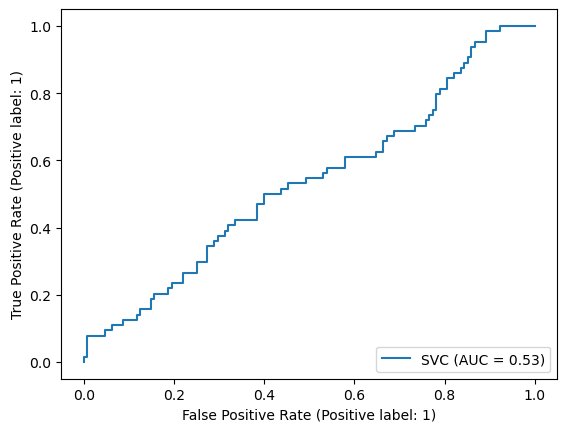

   Accuracy  Precision  Sensitivity_recall  Specificity       AUC
0  0.635417   0.384615             0.15625        0.875  0.532471


In [41]:
    # Confusion Matrix
    confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

    cm_display.plot()
    plt.show()
     
    Accuracy = metrics.accuracy_score(y_test, y_pred)
    Precision = metrics.precision_score(y_test, y_pred)
    Sensitivity_recall = metrics.recall_score(y_test, y_pred)
    Specificity = metrics.recall_score(y_test, y_pred, pos_label=0)

#     print(classification_report(y_test, y_pred))
    plot_roc_curve(clf, X_test, y_test)
    plt.show()
    
    # AUC (y_prob[:,1] khusus untuk random forest dan knn)
    auc = roc_auc_score(y_test, y_prob)
    
     # Simpan hasil ke dalam list
    results.append({'Accuracy': Accuracy,"Precision":Precision,"Sensitivity_recall":Sensitivity_recall,"Specificity":Specificity, 'AUC':auc})
    
    # Buat dataframe dari hasil
    df = pd.DataFrame(results)

    # Print dataframe
    print(df)

In [19]:
    # Confusion Matrix
    confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

    cm_display.plot()
    plt.show()

    print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.98      0.81       128
           1       0.77      0.16      0.26        64

    accuracy                           0.70       192
   macro avg       0.73      0.57      0.54       192
weighted avg       0.72      0.70      0.63       192

